In [1]:
import numpy as np
import scipy.linalg as  la
%matplotlib inline
import matplotlib.pyplot as plt
import time
import hamiltonian as hm
import importlib
import scipy.special
import sys

In [1]:
import objgraph

In [2]:
L = 11

H = hm.sparse_H(L)
vals, vecs = la.eigh(H)
vecsd = vecs.T.conj()

In [ ]:
# Total time elapsed
end = 1
# Time steps per second
n = 1
N = n*end
A = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))
Alist = hm.arr2list(A)
B = np.array([hm.Z[0,0], hm.Z[1,1]])
for i in range(L-1):
    B = np.kron(np.array([1,1]),B)
Blist = hm.arr2list(B)


weightfore9 = np.empty((L, N))
weightback9 = np.empty((L, N))

for i in np.arange(N):
    t = i/n
    unitt = np.matmul(vecs * np.exp(-1j*vals*t), vecsd)
    uninv = np.matmul(vecs * np.exp( 1j*vals*t), vecsd)
    
    ulist = hm.mat2list(unitt)
    uinvlist = hm.mat2list(uninv)
    
    Atlist = []
    for idx, val in enumerate(Alist):
        Atlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    Btlist = []
    for idx, val in enumerate(Blist):
        Btlist.append(np.matmul(uinvlist[idx] * val, ulist[idx]))
    At = hm.list2mat(Atlist)
    Bt = hm.list2mat(Btlist)
    
    front = 1
    back  = 1
    
    for j in range(L):
        At = hm.end_trace(At,1)
        Bt = hm.front_trace(Bt,1)
        fronthere = hm.norm(At)
        backhere  = hm.norm(Bt)
        weightfore9[L-1-j, i] = front - fronthere
        weightback9[j, i]     = back  - backhere
        front = fronthere
        back  = backhere

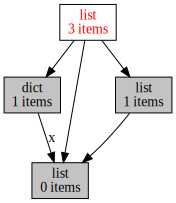

In [2]:
x = []
y = [[x], x, dict(x=x)]
objgraph.show_refs([y])

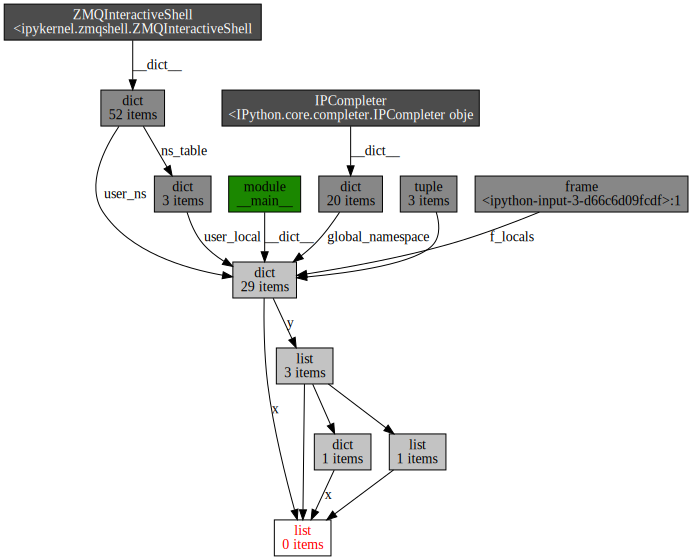

In [3]:
objgraph.show_backrefs([x], filename='sample-backref-graph.png')

In [4]:
objgraph.show_most_common_types()

function                   8445
dict                       5490
tuple                      3524
weakref                    2037
list                       2000
wrapper_descriptor         1176
getset_descriptor          1073
type                       1040
builtin_function_or_method 1034
method_descriptor          990
